<a href="https://colab.research.google.com/github/punamNavale10/COVID_Prediction/blob/main/COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/MyDrive/COVID-19/COVID-19_Radiography_Dataset.zip"

In [ ]:
import os
os.listdir("/content/COVID-19_Radiography_Dataset/COVID")

['images', 'masks']

In [ ]:
print("lists of the images in the covid folder")
len(os.listdir("/content/COVID-19_Radiography_Dataset/COVID/images"))


lists of the images in the covid folder


3616

In [ ]:
print("lists of the images in the normal folder")
len(os.listdir("/content/COVID-19_Radiography_Dataset/Normal/images"))

lists of the images in the normal folder


10192

In [ ]:
import cv2
import matplotlib.pyplot as plt

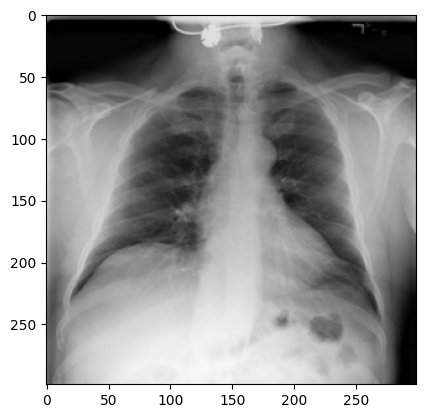

In [ ]:
img=cv2.imread("/content/COVID-19_Radiography_Dataset/Normal/images/Normal-10000.png")
plt.imshow(img)

In [ ]:
img.shape

(299, 299, 3)

In [ ]:
import pandas as pd
df=pd.read_excel('/content/COVID-19_Radiography_Dataset/COVID.metadata.xlsx')
df.head()


,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [ ]:
urls=os.listdir("COVID-19_Radiography_Dataset/COVID/images")

In [ ]:
path="COVID-19_Radiography_Dataset/COVID/images/"+ urls[0]
path

'COVID-19_Radiography_Dataset/COVID/images/COVID-3526.png'

In [ ]:
import cv2

def loadImages(path, urls, target):
    images = []
    labels = []
    for i in range(len(urls)):
        img_path = path + "/" + urls[i]
        img = cv2.imread(img_path)
        # img = cv2.resize(img, (200, 200))
        images.append(img)
        labels.append(target)
    return images, labels



In [ ]:
covid_path="COVID-19_Radiography_Dataset/COVID/images"
covidurl=os.listdir(covid_path)

covidimages,covidtargets= loadImages(covid_path,covidurl,1)

In [ ]:
Normal_path="COVID-19_Radiography_Dataset/Normal/images"
Normalurl=os.listdir(Normal_path)

NormalImages,Normaltargets= loadImages(Normal_path,Normalurl,0)

In [ ]:
import numpy as np
covidimages=np.asarray(covidimages)
NormalImages=np.asarray(NormalImages)

In [ ]:
covidimages.shape

(3616, 299, 299, 3)

In [ ]:
NormalImages.shape

(10192, 299, 299, 3)

In [ ]:
data=np.r_[covidimages,NormalImages]

In [ ]:
data.shape

(13808, 299, 299, 3)

In [ ]:
from PIL import Image

data = [np.array(Image.fromarray(img).resize((40,40))) for img in data]


In [ ]:
data = np.array(data)
data.shape

(13808, 40, 40, 3)

In [ ]:
target = np.r_[covidtargets, Normaltargets]


In [ ]:
target.shape

(13808,)

In [ ]:
data=data/255.0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.20)

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(40,40,3)),
    MaxPooling2D(),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(),

    Flatten(),

    Dense(512, activation='relu'),
    Dense(1028, activation='relu'),
    Dense(128, activation='relu'),

    Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 19, 19, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 6, 6, 16)          9232      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 3, 3, 16)         

In [ ]:
# Assuming you have boolean labels (True/False)
y_train_binary = y_train.astype(int)
y_test_binary = y_test.astype(int)



In [ ]:
# model.fit(x_train,y_train,steps_per_epoch=8,epochs=10,validation_steps=2,validation_data=(x_test,y_test))
model.compile(loss=keras.losses.binary_crossentropy, optimizer="adam", metrics=['accuracy'])
batch_size=16
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    steps_per_epoch=len(x_train) // batch_size,
    epochs=10,
    validation_data=(x_test, y_test),
    validation_steps=len(x_test) // batch_size
)

Epoch 1/10
690/690 [==============================] - 36s 49ms/step - loss: 0.4250 - accuracy: 0.8013 - val_loss: 0.3696 - val_accuracy: 0.8358
Epoch 2/10
690/690 [==============================] - 34s 49ms/step - loss: 0.3200 - accuracy: 0.8581 - val_loss: 0.2723 - val_accuracy: 0.8794
Epoch 3/10
690/690 [==============================] - 32s 47ms/step - loss: 0.2676 - accuracy: 0.8793 - val_loss: 0.2680 - val_accuracy: 0.8826
Epoch 4/10
690/690 [==============================] - 34s 49ms/step - loss: 0.2350 - accuracy: 0.8993 - val_loss: 0.2252 - val_accuracy: 0.8993
Epoch 5/10
690/690 [==============================] - 31s 46ms/step - loss: 0.2046 - accuracy: 0.9149 - val_loss: 0.2406 - val_accuracy: 0.9004
Epoch 6/10
690/690 [==============================] - 33s 48ms/step - loss: 0.1837 - accuracy: 0.9227 - val_loss: 0.2153 - val_accuracy: 0.9062
Epoch 7/10
690/690 [==============================] - 33s 49ms/step - loss: 0.1632 - accuracy: 0.9325 - val_loss: 0.2077 - val_accuracy:

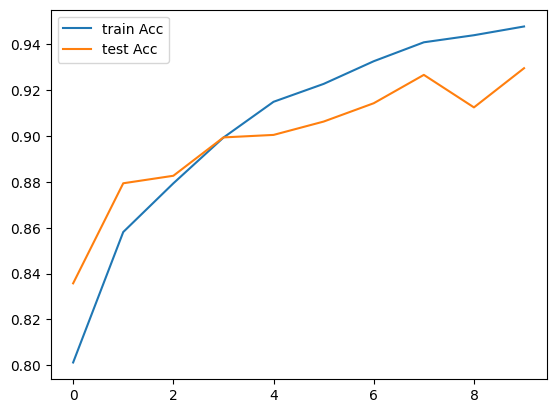

In [ ]:
plt.plot(model.history.history['accuracy'], label='train Acc')
plt.plot(model.history.history['val_accuracy'],label='test Acc')
plt.legend()
plt.show()


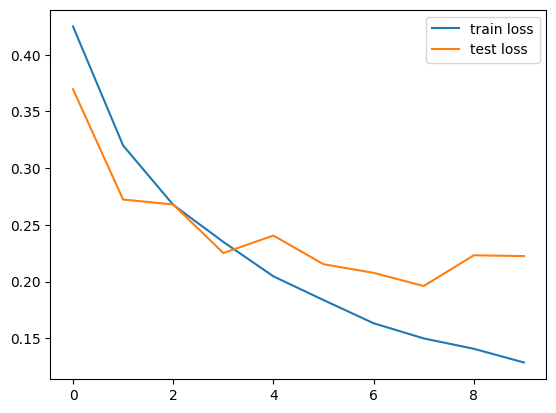

In [ ]:
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'],label='test loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)
print(y_pred)
y_pred_binary = (y_pred > 0.5).astype(int)

print(y_pred_binary)

87/87 [==============================] - 2s 18ms/step
[[2.3547747e-08]
 [6.3977636e-06]
 [8.8443771e-02]
 ...
 [8.5343874e-01]
 [8.3063933e-06]
 [7.0268550e-05]]
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred_binary)
print("\nClassification Report:")
print(class_report)

accuracy = accuracy_score(y_test, y_pred_binary)
print("\nAccuracy Score:", accuracy)


Confusion Matrix:
[[1976   39]
 [ 155  592]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2015
           1       0.94      0.79      0.86       747

    accuracy                           0.93      2762
   macro avg       0.93      0.89      0.91      2762
weighted avg       0.93      0.93      0.93      2762


Accuracy Score: 0.9297610427226647


In [ ]:
model.evaluate(x_test,y_test)

87/87 [==============================] - 2s 18ms/step - loss: 0.2218 - accuracy: 0.9298


[0.22179771959781647, 0.9297610521316528]